## CA 1, LLMs Spring 2024

- **Name:** Ali Keramati
- **Student ID:** 810198519

---
### This is due on **April 2nd, 2024**, submitted via [elearn](https://elearn.ut.ac.ir/).
#### Your submission should be named using the following format: `CA1_LASTNAME_STUDENTID.ipynb`.

### **IMPORTANT**: After copying this notebook to your Google Drive, please paste a link to it below. To get a publicly-accessible link, hit the *Share* button at the top right, then click "Get shareable link" and copy over the result. If you fail to do this, you will receive no credit for this homework!
# ***LINK: *https://colab.research.google.com/drive/1zk7s2bBY-c1YXrYPSByki8a3TU-iEWTH?usp=sharing****

---

##### *How to do this problem set:*

- Some questions require writing Python code and computing results, and the rest of them have written answers. For coding problems, you will have to fill out all code blocks that say `YOUR CODE HERE`.

- For text-based answers, you should replace the text that says "Write your answer here..." with your actual answer.

- There is no penalty for using AI assistance on this homework as long as you fully disclose it in the final cell of this notebook (this includes storing any prompts that you feed to large language models). That said, anyone caught using AI assistance without proper disclosure will receive a zero on the assignment (we have several automatic tools to detect such cases). We're literally allowing you to use it with no limitations, so there is no reason to lie!

---

##### *Academic honesty*

- We will audit the Colab notebooks from a set number of students, chosen at random. The audits will check that the code you wrote actually generates the answers in your notebook. If you turn in correct answers on your notebook without code that actually generates those answers, we will consider this a serious case of cheating.

- We will also run automatic checks of Colab notebooks for plagiarism. Copying code from others is also considered a serious case of cheating.

---

If you have any further questions or concerns, contact the TA via email:
namazifard@ut.ac.ir

---

# Part 1: Word Embeddings and Masked LMs (40 points)

### Question 1.1 (5 points)

In this part, we will start with `GloVe` [(Pennington et al.)](https://aclanthology.org/D14-1162.pdf) word embeddings. `GloVe` provides low-dimensional dense vectors representing words' semantics. The distance between `GloVe` embeddings captures the semantic relationships of words. We are using the `Gensim` library for  working with `GloVe` embeddings. Let's install `Gensim` and download the 6B token model. Also, we should unzip the model file. Running the cell below could take a few minutes.

In [ ]:
!pip install gensim
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip "/content/glove.6B.zip"

--2024-03-31 08:56:48--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-03-31 08:56:49--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2024-03-31 08:59:28 (5.19 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
 

We are using the model file with 6 billion tokens containing 200-dimensional vectors. Running the cell below will create the word embedding model.

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

glove_input_file = 'glove.6B.200d.txt'
model = KeyedVectors.load_word2vec_format(glove_input_file, binary=False, no_header=True)

Try to write the 5 most similar words to **computer**, **football**, **ocean**, **music**, and **artificial** along with their similarity scores.

In [ ]:
words = ['computer', 'football', 'ocean', 'music', 'artificial']

for word in words:
    if word in model.key_to_index:
        similar_words = model.most_similar(word, topn=5)
        print("Similar words to", word, ":")
        for similar_word, score in similar_words:
            print(similar_word, ":", score)
        print()
    else:
        print(word, "is not in the vocabulary.\n")

Similar words to computer :
computers : 0.8357723951339722
software : 0.7828460335731506
technology : 0.6907660961151123
pc : 0.6647984385490417
systems : 0.658431887626648

Similar words to football :
soccer : 0.8105178475379944
basketball : 0.7896140813827515
league : 0.716710090637207
baseball : 0.7023130655288696
rugby : 0.7006953358650208

Similar words to ocean :
sea : 0.7277445197105408
waters : 0.724154531955719
coast : 0.6972916126251221
atlantic : 0.6918381452560425
seas : 0.6812019348144531

Similar words to music :
musical : 0.7338810563087463
songs : 0.7253574728965759
pop : 0.6906009912490845
musicians : 0.6876541972160339
recording : 0.6848656535148621

Similar words to artificial :
natural : 0.5050912499427795
insemination : 0.4972018897533417
man-made : 0.4853343069553375
synthetic : 0.4769701659679413
creating : 0.4709817171096802



**Analogy** in word embeddings refers to performing algebraic operations on vectors to capture the most similar words to the resulting embedding. One of the most famous examples is the analogy *king - man + woman = queen*. In `Gensim`, we can apply analogies using the `most_similar` function. The `positive` argument receives a list of words and applies addition between their embeddings, while the `negative` argument receives a list of words to subtract their embeddings from the result. In our example, *king* and *woman* are in the positive list, while *man* is in the negative list.

Let's explore more analogies and the power of `GloVe` embeddings. Write down five other analogies.

In [ ]:
analogies = [
    {'positive': ['tehran', 'germany'], 'negative': ['iran']},  # Capital to Country
    {'positive': ['waiter', 'she'], 'negative': ['he']},  # Gender Neutralization in Professions
    {'positive': ['bigger', 'small'], 'negative': ['big']},  # Comparative to Superlative
    {'positive': ['play', 'swam'], 'negative': ['played']},  # Past Tense to Present Tense
    {'positive': ['foot', 'books'], 'negative': ['feet']}  # Singular to Plural
]

colors = ['red']
for i, analogy in enumerate(analogies, 1):
    positive_words = analogy['positive']
    negative_words = analogy['negative']

    if all(word in model.key_to_index for word in positive_words + negative_words):
        result = model.most_similar(positive=positive_words, negative=negative_words, topn=1)
        print(f"Example {i}:")
        print("Analogy:", positive_words, "-", negative_words, "= ?")
        print("Result:", result[0][0], "\n")
    else:
        print(f"Example {i}:")
        print("One or more words are not in the vocabulary.\n")

Example 1:
Analogy: ['tehran', 'germany'] - ['iran'] = ?
Result: berlin 

Example 2:
Analogy: ['waiter', 'she'] - ['he'] = ?
Result: waitress 

Example 3:
Analogy: ['bigger', 'small'] - ['big'] = ?
Result: smaller 

Example 4:
Analogy: ['play', 'swam'] - ['played'] = ?
Result: swim 

Example 5:
Analogy: ['foot', 'books'] - ['feet'] = ?
Result: book 



### Question 1.2 (10 points)
Let's visualize embeddings! We'll start with the following list of words. Extract the embedding for each word and reduce their dimensionality to 2 using the `t-SNE` [(Van der Maaten et al.)](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) algorithm. Then, plot them on a scatter plot with their labels.

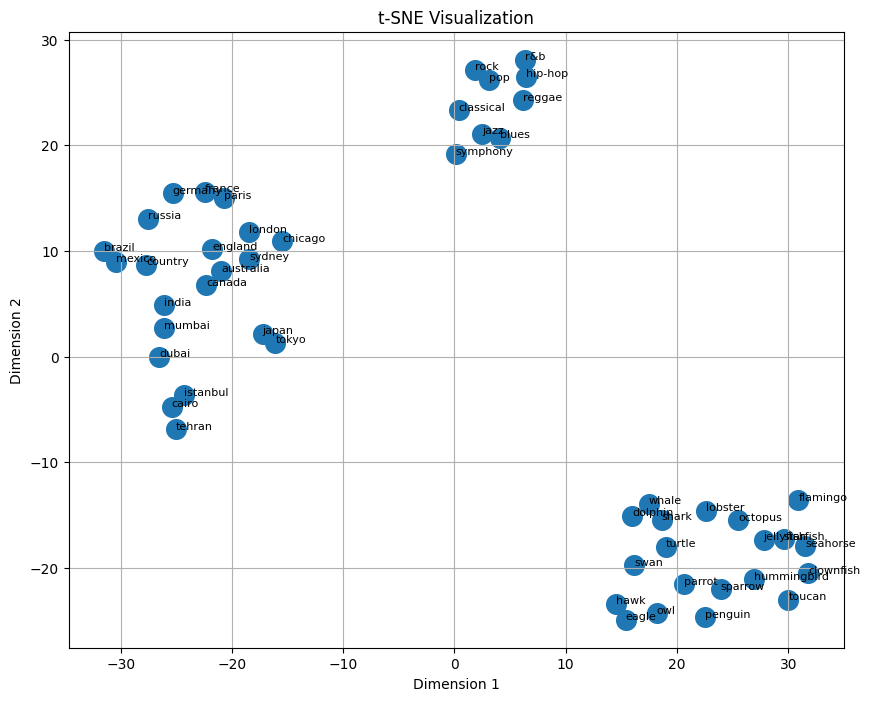

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

words = [
    "dolphin", "shark", "octopus", "jellyfish", "seahorse",
    "turtle", "clownfish", "lobster", "starfish", "whale",
    "eagle", "sparrow", "owl", "hummingbird", "penguin",
    "toucan", "flamingo", "hawk", "parrot", "swan",
    "england", "brazil", "japan", "australia", "india",
    "germany", "canada", "france", "mexico", "russia",
    "chicago", "paris", "tokyo", "london", "sydney",
    "istanbul", "tehran", "cairo", "dubai", "mumbai",
    "symphony", "jazz", "rock", "blues", "reggae",
    "hip-hop", "country", "pop", "classical", "r&b"
]


tsne = TSNE(n_components=2, random_state=0, perplexity=5)
embeddings_200d = np.array([model[w.lower()] for w in words])
# np.array(embeddings_200d).shape

embeddings_2d = tsne.fit_transform(embeddings_200d)

plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=200)

for i, word in enumerate(words):
    plt.annotate(word, xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)

plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

Analyze the plot and clusters of embeddings in a few sentences.

***We can observe distinct clusters forming based on semantic similarities between words. The embeddings of words belonging to the same category tend to be closer to each other in the embedding space. Impact of perplexity number: Adjusting the perplexity parameter can offer different perspectives on the data, allowing for exploration of both local and global semantic relationships within the embedding space. (low perplexity =  local structure and tighter clustering of similar words)***

### Question 1.3 (15 points)
Find the most similar words to **bat** and **charge** in GloVe.

In [ ]:
similar_words_bat = model.most_similar("bat")
similar_words_charge = model.most_similar("charge")

print("Most similar words to 'bat':")
for word, similarity in similar_words_bat:
    print(f"{word}: {similarity}")

print("\nMost similar words to 'charge':")
for word, similarity in similar_words_charge:
    print(f"{word}: {similarity}")

Most similar words to 'bat':
bats: 0.691724419593811
batting: 0.6160588264465332
balls: 0.5692734122276306
batted: 0.5530908107757568
toss: 0.5506128668785095
wicket: 0.5495278835296631
pitch: 0.5489361882209778
bowled: 0.5452010631561279
hitter: 0.5353438854217529
batsman: 0.5348091125488281

Most similar words to 'charge':
charges: 0.8177176117897034
charged: 0.8067139983177185
charging: 0.6606977581977844
guilty: 0.6375356316566467
accused: 0.6239764094352722
for: 0.6172690987586975
responsible: 0.6007314920425415
month: 0.5919045805931091
while: 0.5750368237495422
counts: 0.5714022517204285


Now, consider these sentences:
* *The **bat** flew swiftly through the air.*
* *He grabbed his **bat** and headed to the baseball field.*

Or these sentences:
* *I need to **charge** my phone before leaving.*
* *He was arrested for **charge** of theft.*

As you can see, a static vector cannot capture the meaning of a word in every context, and some words have very different meanings in different sentences. In this part, we will work with a masked language model, which captures contextual embeddings. Let's import necessary modules and load the `BERT` [(Devlin et al.)](https://aclanthology.org/N19-1423.pdf) model.

In [1]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased", output_hidden_states=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

The cell below demonstrates how to input data into the `BERT` model and how to capture word embeddings from each layer.

In [2]:
test_input = "This is a test"
test_encodings = tokenizer(test_input, return_tensors='pt')
output = model(**test_encodings)
print("Num. of BERT layers:", len(output[-1]))
print("Dimensionality of each layer output (batch_size * num_tokens * embedding_dim): ", output[-1][0].size())

Num. of BERT layers: 13
Dimensionality of each layer output (batch_size * num_tokens * embedding_dim):  torch.Size([1, 6, 768])


In this part, you should analyze the embeddings of the word **bat** in the output of each layer of the `BERT` model for the provided sentences. First, identify the location of the **bat** embedding within the output of each layer for both sentences. Next, calculate the `cosine similarity` between the **bat** embeddings for each layer. Finally, examine the similarity levels of the **bat** embeddings between the two sentences across the various layers of the `BERT` model.

In [10]:
from scipy.spatial.distance import cosine

sentence1 = "The bat flew swiftly through the air."
sentence2 = "He grabbed his bat and headed to the baseball field."

tokens1 = tokenizer(sentence1, return_tensors='pt')
tokens2 = tokenizer(sentence2, return_tensors='pt')

output1 = model(**tokens1)
output2 = model(**tokens2)

hidden_states1 = output1.hidden_states
hidden_states2 = output2.hidden_states

bat_index1 = tokens1['input_ids'][0].tolist().index(tokenizer.convert_tokens_to_ids('bat'))
bat_index2 = tokens2['input_ids'][0].tolist().index(tokenizer.convert_tokens_to_ids('bat'))

bat_embeddings1 = [layer[0, bat_index1, :].detach().numpy() for layer in hidden_states1]
bat_embeddings2 = [layer[0, bat_index2, :].detach().numpy() for layer in hidden_states2]

similarities = []
for emb1, emb2 in zip(bat_embeddings1, bat_embeddings2):
    similarity = 1 - cosine(emb1, emb2)
    similarities.append(similarity)

print("Cosine Similarity between 'bat' embeddings across layers:")
for layer, similarity in enumerate(similarities):
    print(f"Layer {layer + 1}: {similarity}")

Cosine Similarity between 'bat' embeddings across layers:
Layer 1: 0.9575223922729492
Layer 2: 0.8337298631668091
Layer 3: 0.7908403277397156
Layer 4: 0.7525651454925537
Layer 5: 0.6812033653259277
Layer 6: 0.6683198809623718
Layer 7: 0.6693581342697144
Layer 8: 0.6561663150787354
Layer 9: 0.6398158073425293
Layer 10: 0.6194900870323181
Layer 11: 0.6181025505065918
Layer 12: 0.6321281790733337
Layer 13: 0.5685119032859802



Do the same for **charge** provided sentences.

In [9]:
sentence1 = "I need to charge my phone before leaving."
sentence2 = "He was arrested for charge of theft."

tokens1 = tokenizer(sentence1, return_tensors='pt')
tokens2 = tokenizer(sentence2, return_tensors='pt')

output1 = model(**tokens1)
output2 = model(**tokens2)

hidden_states1 = output1.hidden_states
hidden_states2 = output2.hidden_states

bat_index1 = tokens1['input_ids'][0].tolist().index(tokenizer.convert_tokens_to_ids('charge'))
bat_index2 = tokens2['input_ids'][0].tolist().index(tokenizer.convert_tokens_to_ids('charge'))

bat_embeddings1 = [layer[0, bat_index1, :].detach().numpy() for layer in hidden_states1]
bat_embeddings2 = [layer[0, bat_index2, :].detach().numpy() for layer in hidden_states2]

similarities = []
for emb1, emb2 in zip(bat_embeddings1, bat_embeddings2):
    similarity = 1 - cosine(emb1, emb2)
    similarities.append(similarity)

print("Cosine Similarity between 'charge' embeddings across layers:")
for layer, similarity in enumerate(similarities):
    print(f"Layer {layer + 1}: {similarity}")

Cosine Similarity between 'charge' embeddings across layers:
Layer 1: 0.9736948013305664
Layer 2: 0.7493430972099304
Layer 3: 0.6692901849746704
Layer 4: 0.5773099660873413
Layer 5: 0.48422256112098694
Layer 6: 0.4574112296104431
Layer 7: 0.39174166321754456
Layer 8: 0.3996471166610718
Layer 9: 0.3381803333759308
Layer 10: 0.33818525075912476
Layer 11: 0.3665906488895416
Layer 12: 0.4260396659374237
Layer 13: 0.3703170418739319


Write a few sentences about your results and how `BERT` captures the contextual meaning of words.



***Initially, in the lower layers (Layer 1), the similarity is very high at 0.9575, indicating that the word "bat" is represented similarly in both sentences at a more basic level of language understanding. However, as we progress through the layers, the similarity gradually decreases, suggesting that the contextual nuances of the word "bat" are being captured more distinctly. This decrease in similarity signifies that BERT is effectively capturing the contextual meaning of the word "bat" as it encounters various linguistic contexts within the sentences (same reasonings applies for the word charge).Overall, the decreasing trend in cosine similarity across layers demonstrates BERT's ability to capture the rich contextual semantics of words, highlighting its effectiveness in understanding and representing language in a nuanced manner.***

### Question 1.4 (10 points)
In this part, we will use `BERT` for masked word completion task. Run the following cell to download the pretrained BERT base model (cased).

In [12]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForMaskedLM.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Let's challenge `BERT`'s knowledge about named entities. Consider the following sentences
- **William Shakespeare**, widely regarded as the greatest writer in the English language, was born in Stratford-upon-Avon, England, in 1564.
- The Amazon Rainforest, spanning across nine countries in **South America**,
is the largest tropical rainforest on Earth, covering an area of over 6.7
million square kilometers (2.7 million square miles) and harboring
unparalleled biodiversity.
- The Statue of Liberty, a gift from **France** to the United States, was dedicated
on October 28, 1886. Standing on Liberty Island in New York Harbor, it
symbolizes freedom and democracy and has become a universal symbol of hope and
opportunity.

Replace the bold words with the mask token (if they are more than one token, put as many as needed). Write down the top 5 choices of BERT for the mask tokens. In this part, you should use `token_logits`.

*Hints*

- Use `torch.where` to find the index of a masked token within the input tensor (note that `tokenizer.mask_token_id` gives us the index of the mask token in the vocabulary).
- Use `torch.topk` to get the k largest elements of a given tensor along a given dimension.
- Use `tokenizer.decode([token_id])` to convert a single integer `token_id` to a token string.

In [14]:
import torch

sentences = [
    "William Shakespeare, widely regarded as the greatest writer in the English language, was born in Stratford-upon-Avon, England, in 1564.",
    "The Amazon Rainforest, spanning across nine countries in South America, is the largest tropical rainforest on Earth, covering an area of over 6.7 million square kilometers (2.7 million square miles) and harboring unparalleled biodiversity.",
    "The Statue of Liberty, a gift from France to the United States, was dedicated on October 28, 1886. Standing on Liberty Island in New York Harbor, it symbolizes freedom and democracy and has become a universal symbol of hope and opportunity."
]

def mask_named_entities(sentence):
    masked_sentence = sentence
    for entity in ["William", "Shakespeare", "South", "America", "France"]:
        masked_entity = tokenizer.mask_token
        masked_sentence = masked_sentence.replace(entity, masked_entity)
    return masked_sentence

masked_sentences = [mask_named_entities(sentence) for sentence in sentences]

inputs = tokenizer(masked_sentences, return_tensors="pt", padding=True, truncation=True)
with torch.no_grad():
    outputs = model(**inputs)

token_logits = outputs.logits

mask_token_id = tokenizer.mask_token_id
for i, sentence in enumerate(masked_sentences):
    masked_indices = torch.where(inputs.input_ids[i] == mask_token_id)[0]  # Corrected line
    for masked_index in masked_indices:
        top_k_values, top_k_indices = torch.topk(token_logits[i, masked_index], k=5, dim=-1)
        top_k_tokens = tokenizer.convert_ids_to_tokens(top_k_indices.tolist())
        print(f"Top 5 choices for masked token {masked_index} in sentence {i+1}:")
        for token, value in zip(top_k_tokens, top_k_values):
            print(f"{tokenizer.mask_token} -> {token}")
        print()


Top 5 choices for masked token 1 in sentence 1:
[MASK] -> thomas
[MASK] -> william
[MASK] -> edmund
[MASK] -> samuel
[MASK] -> henry

Top 5 choices for masked token 2 in sentence 1:
[MASK] -> shakespeare
[MASK] -> scott
[MASK] -> johnson
[MASK] -> shelley
[MASK] -> moore

Top 5 choices for masked token 10 in sentence 2:
[MASK] -> the
[MASK] -> africa
[MASK] -> asia
[MASK] -> global
[MASK] -> modern

Top 5 choices for masked token 11 in sentence 2:
[MASK] -> africa
[MASK] -> world
[MASK] -> asia
[MASK] -> brazil
[MASK] -> amazon

Top 5 choices for masked token 9 in sentence 3:
[MASK] -> england
[MASK] -> france
[MASK] -> britain
[MASK] -> germany
[MASK] -> ireland



Write a few sentences about your results and how masked language modeling works.

***The results show that BERT can understand the context and guess almost perfectly. E.g. in the first sentence, the model correctly suggests names of famous writers such as Thomas, William, Edmund, Samuel, and Henry for the masked tokens, indicative of its understanding of the context of English literature. In the second and third sentences, the model seems to be aware of geography and geopolitical context. Masked language modeling works by masking certain tokens in a sentence and prompting the model to predict what those tokens should be based on the surrounding context. This task helps the model learn representations of language that capture contextual information, allowing it to understand and generate coherent text. BERT, specifically, utilizes a bidirectional transformer architecture to learn deep contextual representations of words, enabling it to accurately predict the masked tokens based on the context provided***

# Part 2: Transfer Learning with BERT (60 points)

## Adding a hardware accelerator

Please go to the menu and add a GPU as follows:

`Edit > Notebook Settings > Hardware accelerator > (GPU)`

Run the following cell to confirm that the GPU is detected.

In [ ]:
import torch

# Confirm that the GPU is detected

assert torch.cuda.is_available()

# Get the GPU device name.
device_name = torch.cuda.get_device_name()
n_gpu = torch.cuda.device_count()
print(f"Found device: {device_name}, n_gpu: {n_gpu}")

AssertionError: 

## Installing Hugging Face's Transformers library
We will use Hugging Face's Transformers (https://github.com/huggingface/transformers), an open-source library that provides general-purpose architectures for natural language understanding and generation with a collection of various pretrained models made by the NLP community. This library will allow us to easily use pretrained models like `BERT` and perform experiments on top of them. We can use these models to solve downstream target tasks, such as text classification, question answering, and sequence labeling.

Run the following cell to install Hugging Face's Transformers library, download data and supporting code for the homework, and install some additional packages. Note that you will be asked to link with your Google Drive account to download some of these files.

In [ ]:
!pip install git+https://github.com/huggingface/accelerate
!pip install transformers
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
print('success!')

import os
import zipfile

data_file = drive.CreateFile({'id': '1zeo8FcaNUnhN660mGMNEAPvxOE4DPOnE'})
data_file.GetContentFile('hw1.zip')

# Extract data from the zipfile and put it into the current directory
with zipfile.ZipFile('hw1.zip', 'r') as zip_file:
    zip_file.extractall('./')
os.remove('hw1.zip')
# We will use hw1 as our working directory
os.chdir('hw1')
print("Data and supporting code downloaded!")

pretrained_models_dir = './pretrained_models_dir'
if not os.path.isdir(pretrained_models_dir):
  os.mkdir(pretrained_models_dir)   # directory to save pretrained models
print('model directory created')

!pip install -r requirements.txt
print('everything set up!')

  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-m4ydkbk1
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-m4ydkbk1
  Resolved https://github.com/huggingface/accelerate to commit d9a1b8f97504efad8055693fd2311aa5199791ca
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


success!
Data and supporting code downloaded!
model directory created
everything set up!


With the advent of methods such as `BERT` [(Devlin et al., 2019)](https://arxiv.org/pdf/1810.04805.pdf), the dominant paradigm for developing NLP models has shifted to transfer learning: first, pretrain a large language model on large amounts of unlabeled data, and then fine-tune the resulting model on the downstream target task. In this section, we will use `BERT` to solve downstream target tasks across several classes of problems, including classification, question answering, and sequence labeling.

### Question 2.1 (25 points)
Before diving into the practical applications, let's first ensure your foundational knowledge is solid. Please answer the following questions briefly, aiming for two or three sentences each. This exercise is designed to prime your understanding of the transformative technologies we're exploring, and making sure you're well-prepared for the hands-on challenges ahead.


**A) Describe the role of the attention mechanism within BERT. How does the multi-head attention mechanism enable BERT to process different parts of the input data simultaneously, and why is this beneficial for natural language understanding tasks?**

**B) Describe how BERT's bidirectionality is different from traditional sequential language models.**

**C) What is segment embedding's functionality in BERT?**

**D) Briefly describe one variant of BERT (e.g., RoBERTa, ALBERT, DistilBERT) and highlight a key difference in its approach or architecture compared to the original BERT model.**

**E) Despite its success, BERT has limitations. Can you identify one limitation or challenge associated with using BERT for NLP tasks?**


***A) In BERT, the attention mechanism helps focus on relevant parts of the sentence by assigning weights to different words. BERT's multi-head attention, enables it to attend to various aspects of the relationships between words concurrently and capture diverse linguistic patterns. This allows BERT to understand richer contexts and word dependencies, leading to more effective performance across various natural language understanding tasks.***

***B) Unlike traditional models that process words sequentially, BERT considers both left and right contexts simultaneously during training. This bidirectionality allows BERT to understand how words depend on each other, regardless of their order, leading to a more accurate grasp of meaning. Traditional language models struggle with ambiguous words or phrases, while BERT's bi-directional nature considers the entire sentence context, facilitating disambiguation and accurate capture of word meanings.***

***C) Segment embeddings differentiate between parts of the input text, like sentences in a pair. By adding a unique embedding to each word depending on its "segment", it helps BERT understand the relationships and boundaries between different parts of the input text, especially in tasks involving multiple sentences or passages.***

***D) One variant of BERT is DistilBERT which is a smaller and faster version of BERT that aims to compress the original BERT model while preserving its performance. It achieves this by utilizing a smaller architecture with fewer layers and parameters compared to the original BERT model. Unlike BERT's reliance on masked language modeling, DistilBERT utilizes a technique called knowledge distillation where a student model (DistilBERT) learns from a larger teacher model (BERT) by mimicking its predictions.***

***E) BERT requires significant computational resources and training time, making it less accessible to smaller organizations or those with limited budgets. BERT's large architecture requires significant computational power and memory, making it challenging to deploy in resource-constrained environments or on devices with limited processing capabilities.***

After answering the above questions, let's run the cell below to import necessary packages and set some things up for fine-tuning `BERT`.

In [ ]:
# coding=utf-8

import dataclasses
import logging
import math
import os
import timeit
from dataclasses import dataclass, field
from typing import Callable, Dict, List, Tuple, Optional

import numpy as np
from seqeval.metrics import accuracy_score, f1_score, precision_score, recall_score
import torch
from torch.utils.data import DataLoader, SequentialSampler
from tqdm import tqdm

from transformers import (
    AutoConfig,
    AutoModelWithLMHead,
    AutoModelForSequenceClassification,
    AutoModelForQuestionAnswering,
    AutoModelForTokenClassification,
    AutoTokenizer,
    PreTrainedTokenizer,
    EvalPrediction
)
from transformers import (
    GlueDataset,
    SquadDataset,
    LineByLineTextDataset,
    TextDataset,
    DataCollatorForLanguageModeling,
)
from transformers import GlueDataTrainingArguments, SquadDataTrainingArguments
from transformers import (
    Trainer,
    TrainingArguments,
    glue_compute_metrics,
    glue_output_modes,
    glue_tasks_num_labels,
    set_seed,
)
from transformers.data.processors.squad import SquadResult
from transformers.data.metrics.squad_metrics import (
    compute_predictions_logits,
    squad_evaluate,
)
from tasks import NER
from utils_ner import Split, TokenClassificationDataset, TokenClassificationTask

from transformers import glue_processors
from transformers.data.processors.utils import InputExample
from langdetect import detect

logger = logging.getLogger(__name__)


@dataclass
class ModelArguments:
    """
    Arguments pertaining to which model/config/tokenizer we are going to fine-tune from.
    """
    model_type: str = field(
        default="bert",
        metadata={"help": "Model type, e.g., bert."}
    )
    model_name_or_path: str = field(
        default="bert",
        metadata={"help": "Path to pretrained model or model identifier from huggingface.co/models."}
    )
    do_lower_case: Optional[bool] = field(
        default=False,
        metadata={"help": "Whether you want to do lower case on input before tokenization."}
    )
    model_cache_dir: Optional[str] = field(
        default=None,
        metadata={"help": "Where you want to store the pretrained models downloaded from s3."}
    )
    data_cache_dir: Optional[str] = field(
        default=None,
        metadata={"help": "Where you want to store the cached features for the task."}
    )


@dataclass
class NerDataTrainingArguments:
    """
    Arguments pertaining to what data we are going to input our model for training and eval.
    """

    data_dir: str = field(
        metadata={"help": "The input data dir. Should contain data files for the task."}
    )
    labels: Optional[str] = field(
        default=None,
        metadata={"help": "Path to a file containing all labels for the task."},
    )
    max_seq_length: int = field(
        default=128,
        metadata={
            "help": "The maximum total input sequence length after tokenization. Sequences longer "
            "than this will be truncated, sequences shorter will be padded."
        },
    )
    overwrite_cache: bool = field(
        default=False, metadata={"help": "Overwrite the cached training and evaluation sets."}
    )


@dataclass
class LMDataTrainingArguments:
    """
    Arguments pertaining to what data we are going to input our model for training and eval.
    """

    train_data_file: Optional[str] = field(
        default=None, metadata={"help": "The input training data file (a text file)."}
    )
    eval_data_file: Optional[str] = field(
        default=None,
        metadata={"help": "An optional input evaluation data file to evaluate the perplexity on (a text file)."},
    )
    line_by_line: bool = field(
        default=False,
        metadata={"help": "Whether distinct lines of text in the dataset are to be handled as distinct sequences."},
    )

    mlm: bool = field(
        default=False, metadata={"help": "Train with masked-language modeling loss instead of language modeling."}
    )
    mlm_probability: float = field(
        default=0.15, metadata={"help": "Ratio of tokens to mask for masked language modeling loss"}
    )
    block_size: int = field(
        default=-1,
        metadata={
            "help": "Optional input sequence length after tokenization."
            "The training dataset will be truncated in block of this size for training."
            "Default to the model max input length for single sentence inputs (take into account special tokens)."
        },
    )
    overwrite_cache: bool = field(
        default=False, metadata={"help": "Overwrite the cached training and evaluation sets"}
    )


def get_dataset(
    args: LMDataTrainingArguments,
    tokenizer: PreTrainedTokenizer,
    evaluate: bool = False,
    cache_dir: Optional[str] = None,
):
    file_path = args.eval_data_file if evaluate else args.train_data_file
    if args.line_by_line:
        return LineByLineTextDataset(tokenizer=tokenizer, file_path=file_path, block_size=args.block_size)
    else:
        return TextDataset(
            tokenizer=tokenizer,
            file_path=file_path,
            block_size=args.block_size,
            overwrite_cache=args.overwrite_cache,
            cache_dir=cache_dir,
        )


DATA_TRAINING_ARGUMENTS = {
    "text_classification": GlueDataTrainingArguments,
    "question_answering": SquadDataTrainingArguments,
    "sequence_labeling": NerDataTrainingArguments,
}


AUTO_MODEL = {
    "text_classification": AutoModelForSequenceClassification,
    "question_answering": AutoModelForQuestionAnswering,
    "sequence_labeling": AutoModelForTokenClassification,
}


DATASET = {
    "text_classification": GlueDataset,
    "question_answering": SquadDataset,
    "sequence_labeling": TokenClassificationDataset,
}


# some functions for fine-tuning BERT on a downstream target task
def do_target_task_finetuning(model_name_or_path, task_type, output_dir, **kwargs):
    r""" Fine-tuning BERT on a downstream target task.
    Params:
        **model_name_or_path**: either:
            - a string with the `shortcut name` of a pre-trained model configuration to load from cache
                or download and cache if not already stored in cache (e.g. 'bert-base-uncased').
            - a path to a `directory` containing a configuration file saved
                using the `save_pretrained(save_directory)` method.
            - a path or url to a saved configuration `file`.
        **task_type**: string:
            The class of the task to train, selected in
            ["text_classification", "question_answering", "sequence_labeling"].
        **output_dir**: string:
            The output directory where the model predictions and checkpoints will be written.
        **kwargs**: (`optional`) dict:
            Dictionary of key/value pairs with which to update the configuration object after loading.
            - The values in kwargs of any keys which are configuration attributes will be used
            to override the loaded values.
    """
    # See all possible arguments in src/transformers/training_args.py

    assert task_type in DATA_TRAINING_ARGUMENTS
    model_args = ModelArguments(model_name_or_path=model_name_or_path)
    data_args_params = {}
    for param in ["task_name", "data_dir"]:
        if param in kwargs:
            data_args_params.update({param: kwargs[param]})

    data_args = DATA_TRAINING_ARGUMENTS[task_type](**data_args_params)
    training_args = TrainingArguments(output_dir=output_dir)

    # override the loaded configs
    configs = (model_args, data_args, training_args)
    for config in configs:
        for key, value in kwargs.items():
            if hasattr(config, key):
                setattr(config, key, value)

    if (
        os.path.exists(training_args.output_dir)
        and os.listdir(training_args.output_dir)
        and training_args.do_train
        and not training_args.overwrite_output_dir
    ):
        raise ValueError(
            f"Output directory ({training_args.output_dir}) already exists and is not empty. "
            f"Use --overwrite_output_dir to overcome."
        )

    for p in [model_args.model_cache_dir, model_args.data_cache_dir, training_args.output_dir]:
        if not os.path.exists(p):
            os.makedirs(p)

    # Setup logging
    logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s -   %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO,
    )

    logger.info("Process device: %s, n_gpu: %s", training_args.device, training_args.n_gpu)
    logger.info("Training/evaluation parameters %s", training_args)


    # Set seed
    set_seed(training_args.seed)

    if task_type == "text_classification":
        try:
            data_args.task_name = data_args.task_name.lower()
            num_labels = glue_tasks_num_labels[data_args.task_name]
            output_mode = glue_output_modes[data_args.task_name]
        except KeyError:
            raise ValueError("Task not found: %s" % (data_args.task_name))
    elif task_type == "sequence_labeling":
        token_classification_task = NER() # You might want to this to Chunk() or POS()
        # if you are working with a Chunk or POS task, respectively
        labels = token_classification_task.get_labels(data_args.labels)
        label_map: Dict[int, str] = {i: label for i, label in enumerate(labels)}
        num_labels = len(labels)

    # Load pretrained model and tokenizer

    AutoModel = AUTO_MODEL[task_type]
    auto_config_params = {
        'pretrained_model_name_or_path': model_args.model_name_or_path,
        'cache_dir': model_args.model_cache_dir,
    }

    if task_type == "text_classification":
        auto_config_params.update({
            "num_labels": num_labels,
            "finetuning_task": data_args.task_name,
        })
    elif task_type == "sequence_labeling":
        auto_config_params.update({
            "num_labels": num_labels,
            "id2label": label_map,
            "label2id": {label: i for i, label in enumerate(labels)},
        })

    config = AutoConfig.from_pretrained(**auto_config_params)

    auto_tokenizer_params = {
        "pretrained_model_name_or_path": model_args.model_name_or_path,
        "cache_dir": model_args.model_cache_dir,
        "do_lower_case": model_args.do_lower_case,
    }
    tokenizer = AutoTokenizer.from_pretrained(**auto_tokenizer_params)

    auto_model_params = {
        "pretrained_model_name_or_path": model_args.model_name_or_path,
        "from_tf": False,
        "config": config,
        "cache_dir": model_args.model_cache_dir,
    }

    if "model_load_mode" in kwargs and kwargs["model_load_mode"] == "base_model_only":
        WEIGHTS_NAME = "pytorch_model.bin"
        archive_file = os.path.join(model_args.model_name_or_path, WEIGHTS_NAME)
        # Use torch.load with map_location=torch.device() to map the pretrained model to our device.
        model_state_dict = torch.load(archive_file, map_location=torch.device(training_args.device))

        state_dict_with_prefix = {}
        for key, value in model_state_dict.items():
            if key.startswith(model_args.model_type):
                state_dict_with_prefix[key] = value

        auto_model_params.update({"state_dict": state_dict_with_prefix})

    model = AutoModel.from_pretrained(**auto_model_params)

    # Get datasets
    Dataset = DATASET[task_type]
    dataset_params = {
        "tokenizer": tokenizer,
    }
    if task_type == "sequence_labeling":
        dataset_params.update({
            "token_classification_task": token_classification_task,
            "data_dir": data_args.data_dir,
            "labels": labels,
            "model_type": model_args.model_type,
            "max_seq_length": data_args.max_seq_length
        })

    else:
        dataset_params.update({
            "args": data_args,
            "cache_dir": model_args.data_cache_dir,
        })

    train_dataset = (Dataset(**dataset_params) if training_args.do_train else None)

    dataset_params.update({"mode": Split.dev if task_type == "sequence_labeling" else "dev"})
    eval_dataset = (Dataset(**dataset_params) if training_args.do_eval else None)

    # Initialize our Trainer
    trainer_params = {
        "model": model,
        "args": training_args,
        "train_dataset": train_dataset,
        "eval_dataset": eval_dataset,
    }
    trainer = Trainer(**trainer_params)

    # Training
    if training_args.do_train:
        trainer.train(
            model_path=model_args.model_name_or_path if os.path.isdir(model_args.model_name_or_path) else None
        )
        trainer.save_model()
        # For convenience, we also re-save the tokenizer to the same directory
        tokenizer.save_pretrained(training_args.output_dir)

    # Evaluation
    eval_results = {}
    if training_args.do_eval:
        if task_type == "text_classification":
            def build_compute_metrics_fn(task_name: str) -> Callable[[EvalPrediction], Dict]:
                def compute_metrics_fn(p: EvalPrediction):
                    if output_mode == "classification":
                        preds = np.argmax(p.predictions, axis=1)
                    elif output_mode == "regression":
                        preds = np.squeeze(p.predictions)
                    return glue_compute_metrics(task_name, preds, p.label_ids)
                return compute_metrics_fn

            logger.info("*** Evaluate ***")
            # Loop to handle MNLI double evaluation (matched, mis-matched)
            eval_datasets = [eval_dataset]
            if data_args.task_name == "mnli":
                mnli_mm_data_args = dataclasses.replace(data_args, task_name="mnli-mm")
                eval_datasets.append(
                    Dataset(mnli_mm_data_args, tokenizer=tokenizer, mode="dev", cache_dir=model_args.data_cache_dir)
                )

            for eval_dataset in eval_datasets:
                trainer.compute_metrics = build_compute_metrics_fn(eval_dataset.args.task_name)
                eval_result = trainer.evaluate(eval_dataset=eval_dataset)

                output_eval_file = os.path.join(training_args.output_dir, f"eval_results.txt")
                with open(output_eval_file, "w") as writer:
                    logger.info("***** Eval results *****")
                    for key, value in eval_result.items():
                        logger.info("  %s = %s", key, value)
                        writer.write("%s = %s\n" % (key, value))

                eval_results.update(eval_result)

        elif task_type == "question_answering":
            # We don't use trainer.evaluate here since it currently does not support question answering tasks
            # (https://github.com/huggingface/transformers/issues/7032)
            model = AutoModel.from_pretrained(model_args.model_cache_dir)
            tokenizer = AutoTokenizer.from_pretrained(model_args.model_cache_dir, do_lower_case=model_args.do_lower_case)
            model.to(training_args.device)


            dataset = eval_dataset.dataset
            examples = eval_dataset.examples
            features = eval_dataset.features
            eval_batch_size = training_args.per_gpu_eval_batch_size * max(1, training_args.n_gpu)

            eval_sampler = SequentialSampler(dataset)
            eval_dataloader = DataLoader(dataset, sampler=eval_sampler, batch_size=eval_batch_size)

            logger.info("*** Evaluate ***")
            description = "Evaluation"
            logger.info("***** Running %s *****", description)
            logger.info("  Num examples = %d", len(dataset))
            logger.info("  Batch size = %d", eval_batch_size)

            all_results = []
            start_time = timeit.default_timer()

            for batch in tqdm(eval_dataloader, desc=description):
                model.eval()
                batch = tuple(t.to(training_args.device) for t in batch)

                with torch.no_grad():
                    inputs = {
                        "input_ids": batch[0],
                        "attention_mask": batch[1],
                        "token_type_ids": batch[2],
                    }
                    feature_indices = batch[3]
                    outputs = model(**inputs)

                for i, feature_index in enumerate(feature_indices):
                    eval_feature = features[feature_index.item()]
                    unique_id = int(eval_feature.unique_id)
                    output = [output[i].detach().cpu().tolist() for output in outputs]
                    start_logits, end_logits = output
                    result = SquadResult(unique_id, start_logits, end_logits)
                    all_results.append(result)

            evalTime = timeit.default_timer() - start_time
            logger.info("  Evaluation done in total %f secs (%f sec per example)", evalTime, evalTime / len(dataset))

            # Compute predictions
            output_prediction_file = os.path.join(training_args.output_dir, "predictions.json")
            output_nbest_file = os.path.join(training_args.output_dir, "nbest_predictions.json")

            output_null_log_odds_file = os.path.join(training_args.output_dir, "null_odds.json") \
                if data_args.version_2_with_negative else None

            predictions = compute_predictions_logits(
                all_examples=examples,
                all_features=features,
                all_results=all_results,
                n_best_size=data_args.n_best_size,
                max_answer_length=data_args.max_answer_length,
                do_lower_case=model_args.do_lower_case,
                output_prediction_file=output_prediction_file,
                output_nbest_file=output_nbest_file,
                output_null_log_odds_file=output_null_log_odds_file,
                verbose_logging=False,
                version_2_with_negative=data_args.version_2_with_negative,
                null_score_diff_threshold=data_args.null_score_diff_threshold,
                tokenizer=tokenizer,
            )

            # Compute the F1 and exact scores.
            eval_result = squad_evaluate(examples, predictions)

            output_eval_file = os.path.join(training_args.output_dir, f"eval_results.txt")
            with open(output_eval_file, "w") as writer:
                logger.info("***** Eval results *****")
                for key, value in eval_result.items():
                    logger.info("  %s = %s", key, value)
                    writer.write("%s = %s\n" % (key, value))

            eval_results.update(eval_result)


        elif task_type == "sequence_labeling":
            def align_predictions(predictions: np.ndarray, label_ids: np.ndarray) -> Tuple[List[int], List[int]]:
                preds = np.argmax(predictions, axis=2)
                batch_size, seq_len = preds.shape
                label_list = [[] for _ in range(batch_size)]
                pred_list = [[] for _ in range(batch_size)]

                for i in range(batch_size):
                    for j in range(seq_len):
                        if label_ids[i, j] != torch.nn.CrossEntropyLoss().ignore_index:
                            label_list[i].append(label_map[label_ids[i][j]])
                            pred_list[i].append(label_map[preds[i][j]])
                return pred_list, label_list

            def compute_metrics_fn(p: EvalPrediction) -> Dict:
                pred_list, label_list = align_predictions(p.predictions, p.label_ids)
                return {
                    "accuracy_score": accuracy_score(label_list, pred_list),
                    "precision": precision_score(label_list, pred_list),
                    "recall": recall_score(label_list, pred_list),
                    "f1": f1_score(label_list, pred_list),
                }

            trainer.compute_metrics = compute_metrics_fn
            eval_result = trainer.evaluate(eval_dataset=eval_dataset)

            output_eval_file = os.path.join(training_args.output_dir, f"eval_results.txt")
            with open(output_eval_file, "w") as writer:
                logger.info("***** Eval results *****")
                for key, value in eval_result.items():
                    logger.info("  %s = %s", key, value)
                    writer.write("%s = %s\n" % (key, value))

            eval_results.update(eval_result)

        else:
            raise ValueError("Invalid task type.")
    return eval_results


print('setup complete')

setup complete


## Fine-tuning BERT for text classification
Now, let's use `BERT` to solve a sentiment classification task. Specifically, we'll be using the Stanford Sentiment Treebank [(Socher et al., 2013)](https://nlp.stanford.edu/~socherr/EMNLP2013_RNTN.pdf), which was constructed from movie reviews data. We provide code to fine-tune BERT in a separate ["useful code" Colab notebook](https://colab.research.google.com/drive/1nJWA9rPkPrjjjtwN_vKUSQoomdfWLAFV?usp=sharing), so check that out if you're interested. However, since training on the full `SST` dataset (67K examples) takes a while, we provide you with a fine-tuned model to save time. Run the following cell to download the model.



In [ ]:
data_file = drive.CreateFile({'id': '1ZJ1_gWahH_OOBIrRm0aN9i8nvLB2olZC'})
data_file.GetContentFile('bert-base-cased-finetuned-sst.zip')

# Extract the data from the zipfile and put it into pretrained_models_dir
with zipfile.ZipFile('bert-base-cased-finetuned-sst.zip', 'r') as zip_file:
    zip_file.extractall(pretrained_models_dir)
os.remove('bert-base-cased-finetuned-sst.zip')
print("bert-base-cased-finetuned-sst downloaded!")

bert-base-cased-finetuned-sst downloaded!


### Question 2.2 (5 points)
Let's use the trained model to predict the sentiment of a given sentence. We will make a few predictions in the code below. Your task is to complete the code to print out the model's predicted probability distribution for each sentence.

*Hint:*

*   `model(inputs)[0]` gives you the logits of the model for `inputs`.

In [ ]:
import torch
import torch.nn.functional as F

model_name_or_path = "bert-base-cased-finetuned-sst"
pretrained_weights = os.path.join(pretrained_models_dir, model_name_or_path)
task_type = "text_classification"
model = AUTO_MODEL[task_type].from_pretrained(pretrained_weights)
tokenizer = AutoTokenizer.from_pretrained(pretrained_weights)

classes = ["negative", "positive"]

sentence_1 = "the movie has something interesting to say"
sentence_2 = "it was so awful that i walked out after 30 minutes :("

inputs_1 = tokenizer.encode(sentence_1, add_special_tokens=True, return_tensors="pt")
inputs_2 = tokenizer.encode(sentence_2, add_special_tokens=True, return_tensors="pt")

model.eval()

with torch.no_grad():
    logits_1 = model(inputs_1)[0]
    logits_2 = model(inputs_2)[0]

probs_1 = F.softmax(logits_1, dim=1).squeeze()
probs_2 = F.softmax(logits_2, dim=1).squeeze()

print("Sentence 1:", sentence_1)
for i, class_name in enumerate(classes):
    print(f"Probability of {class_name}: {probs_1[i].item():.4f}")

print("\nSentence 2:", sentence_2)
for i, class_name in enumerate(classes):
    print(f"Probability of {class_name}: {probs_2[i].item():.4f}")


Sentence 1: the movie has something interesting to say
Probability of negative: 0.0011
Probability of positive: 0.9989

Sentence 2: it was so awful that i walked out after 30 minutes :(
Probability of negative: 0.9978
Probability of positive: 0.0022


### Question 2.3 (5 points)
Come up with a new sentence that the model gets wrong. The sentence must contain some sentiment (i.e., it cannot be neutral), and the model should place a higher probability on the wrong label than the correct one. Show the model's prediction on this new sentence.

In [ ]:
your_sentence = "Don't pay attention to people if they say it's no good."
your_sentence_sentiment = 'positive'

inputs = tokenizer.encode(your_sentence, add_special_tokens=True, return_tensors="pt")

with torch.no_grad():
    logits = model(inputs)[0]

your_model_prediction = F.softmax(logits, dim=1).squeeze().tolist()

print('your sentence: "%s"\nground-truth label: %s\npredicted negative prob: %0.2f\npredicted positive prob: %0.2f'\
      % (your_sentence, your_sentence_sentiment, your_model_prediction[0], your_model_prediction[1]))

your sentence: "Don't pay attention to people if they say it's no good."
ground-truth label: positive
predicted negative prob: 1.00
predicted positive prob: 0.00


### Question 2.4 (5 points)
Provide a reasonable explanation as to why the model got your sentence wrong. Also provide a plausible method to improve the underlying sentiment model so that this kind of error stops happening.

***Reason for BERT's mistake:***



1.   **Negation handling:** BERT models are trained on massive amounts of text data. While they can grasp context, they might initially focus on individual words. Although the sentence contains negative words like "don't" and "no good," the overall sentiment is positive because it advises not to heed negative opinions. However, the model may focus more on the negative words without properly considering their context, leading to the incorrect prediction.


2.  **Limited Context Understanding:** BERT struggles with complex sentence structures and sarcasm to some degree. The sentiment expressed in the sentence relies heavily on subtle contextual cues and implied meanings. It might not fully grasp the speaker's intent, which is to encourage ignoring negativity.


***Methods to improve sentiment analysis:***


1.   **Fine-tuning with negation-aware data:** Fine-tuning the model on a dataset that includes examples with negation and contradictory sentiments can help the model learn to handle negation more effectively. This helps it learn to analyze sentence structure and word relationships better, leading to a more nuanced understanding of the intended meaning.
2.   **Sentiment Lexicon Expansion:**  Expand the sentiment lexicon used by the model to include phrases that express negativity indirectly, like "pay no attention." This helps the model recognize these phrases as conveying a negative sentiment about something else (the people saying it's no good).

3. **Negation Detection:**  Modify the model to specifically identify and account for negation words like "don't" or "not." This would help flip the overall sentiment based on the context





## Fine-tuning BERT for question answering
In this section, we will use `BERT` for a question answering task, i.e., `SQuAD` [(Rajpurkar et al., 2016)](https://nlp.stanford.edu/pubs/rajpurkar2016squad.pdf) whose dataset was built from Wikipedia. Training on the full `SQuAD` dataset (108K examples) would takes a couple of hours, so we will provide you with a trained model to save your time. Run the following cell to download the model.

In [ ]:
data_file = drive.CreateFile({'id': '19cnGSN88KlRJRcIqwxw3C4ylJftdkZ2W'})
data_file.GetContentFile('bert-base-cased-finetuned-squad.zip')

# Extract the data from the zipfile and put it into pretrained_models_dir
with zipfile.ZipFile('bert-base-cased-finetuned-squad.zip', 'r') as zip_file:
    zip_file.extractall(pretrained_models_dir)
os.remove('bert-base-cased-finetuned-squad.zip')
print("bert-base-cased-finetuned-squad downloaded!")

bert-base-cased-finetuned-squad downloaded!


### Question 2.5 (10 points)

Okay, same drill as before! Your task is to complete the code to show the model's predicted answer to each question. If you forgot how `BERT` solves extractive question answering tasks, check out Section 4.2 and Figure 1 / Figure 4c) in the [BERT paper](https://arxiv.org/pdf/1810.04805.pdf). Your output should be three strings, each corresponding to the answer of one of the three given questions.

*Hints*

*   `model(**inputs)]` gives you the start and end logits of the model for  `inputs`.
*   Use `tokenizer.convert_tokens_to_string` to convert a sequence of tokens (string) into a single string.
*   Use `tokenizer.convert_ids_to_tokens` to convert a sequence of indices into a sequence of tokens.

In [ ]:
task_name = "SQuAD"
model_name_or_path = "bert-base-cased-finetuned-squad"
pretrained_weights = os.path.join(pretrained_models_dir, model_name_or_path)
task_type = "question_answering"
model = AUTO_MODEL[task_type].from_pretrained(pretrained_weights)
tokenizer = AutoTokenizer.from_pretrained(pretrained_weights)

context = """This course will broadly focus on deep learning methods for
natural language processing. Most of the semester will focus on very recent
transfer learning methods that have significantly pushed forward the state of
the art. It is intended for graduate students in computer science and
linguistics who are (1) interested in learning about cutting-edge research
progress in NLP and (2) familiar with machine learning fundamentals. We will
cover modeling architectures, training objectives, and downstream tasks (e.g.,
text classification, question answering, and text generation). Coursework
includes reading recent research papers, programming assignments, and a final
project. This class will be asynchronous: lectures will be prerecorded and
posted on a weekly basis, along with accompanying readings and assignments."""

questions = [
    "What is the focus of this course?",
    "Who is this course intended for?",
    "What is the coursework?",
]

for question in questions:
    inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()[0]

    outputs = model(**inputs)
    start_logits, end_logits = outputs.start_logits, outputs.end_logits
    start_index = torch.argmax(start_logits)
    end_index = torch.argmax(end_logits) + 1
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[start_index:end_index]))
    print("Question:", question)
    print("Answer:", answer)
    print()

Some weights of the model checkpoint at ./pretrained_models_dir/bert-base-cased-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Question: What is the focus of this course?
Answer: deep learning methods for natural language processing

Question: Who is this course intended for?
Answer: graduate students in computer science and linguistics

Question: What is the coursework?
Answer: reading recent research papers, programming assignments, and a final project



### Question 2.6 (5 points)
Come up with a new question about this passage that the model gets wrong. The question must be answerable by the passage (i.e., its ground-truth answer should be a span of text within the passage). Show the model's predicted answer on this new sentence.

In [ ]:
your_question = "What are the prerequisites for taking this course?"
your_answer = "graduate students in computer science and linguistics"
# your_model_prediction = 'blah blah' # obviously, change this to the model's predicted answer span


inputs = tokenizer.encode_plus(your_question, context, add_special_tokens=True, return_tensors="pt")
outputs = model(**inputs)
start_logits, end_logits = outputs.start_logits, outputs.end_logits
start_index = torch.argmax(start_logits)
end_index = torch.argmax(end_logits) + 1
your_model_prediction = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs["input_ids"].tolist()[0][start_index:end_index]))


print('your question: "%s"\nground-truth answer: %s\npredicted answer: %s'\
      % (your_question, your_answer, your_model_prediction))

your question: "What are the prerequisites for taking this course?"
ground-truth answer: graduate students in computer science and linguistics
predicted answer: lectures will be prerecorded and posted on a weekly basis, along with accompanying readings and assignments


### Question 2.7 (5 points)
Provide a reasonable explanation as to why the model got your question wrong. Also provide a plausible method to improve the underlying QA model so that this kind of error stops happening.

***Reason for the mistake:***

*   **Focus on surface-level features:** BERT models are excellent at understanding context and relationships between words. However, for question answering, they can get sidetracked by surface-level features that correlate with the answer but aren't necessarily the answer itself. In this case, The model fixated on the keywords "posted on a weekly basis" which might be associated with course material and prerequisites in the context of online courses. In other words, the model likely identified keywords like "posted," "readings," and "assignments," which are all related to course logistics, and mistakenly assumed they described prerequisites.

*  **Lack of Explicit Mention:** The passage does not explicitly state the prerequisites in a single concise sentence. Instead, it provides information about the target audience's characteristics, which the model might have failed to grasp effectively.

***Methods to improve the model:***



*   **Fine-tuning on question-answering datasets:** While BERT is a powerful pre-trained model, fine-tuning it on a question-answering dataset specifically focused on educational content could significantly improve performance fro this type of questions.

*   **Active Learning:** Continuously update and refine the model based on feedback from incorrect predictions, actively seeking human input to correct and improve its understanding of prerequisite-related questions.






## AI Disclosure

*   Did you use any AI assistance to complete this homework? If so, please also specify what AI you used.
    * Yes. Chat GPT and Gemini


---
*(only complete the below questions if you answered yes above)*

*   If you used a large language model to assist you, please paste *all* of the prompts that you used below. Add a separate bullet for each prompt, and specify which problem is associated with which prompt.
    * **1.1.a)** My prompt: *We are using the Gensim library for working with GloVe embeddings.
with this line of code I have loaded glove 6B:
model = KeyedVectors.load_word2vec_format(glove_input_file, binary=False, no_header=True)
now help me write a code to print the 5 most similar words to computer, football, ocean, music, and artificial along with their similarity scores.*
    * 1.1.b) My prompt: write the code to apply analogies using Gensim's most_similar() function. give 5 examples. (sth other than king - man + woman = queen)

    * 1.2.a) My prompt: beatify this plot.

    * 1.2.b) My prompt: check grammar.

    * 1.3.a) My prompt: Find the most similar words to bat and charge in GloVe.

    * 1.3.b) My prompt: In this part, you should analyze the embeddings of the word bat in the output of each layer of the BERT model for the provided sentences. First, identify the location of the bat embedding within the output of each layer for both sentences. Next, calculate the cosine similarity between the bat embeddings for each layer. Finally, examine the similarity levels of the bat embeddings between the two sentences across the various layers of the BERT model. one-shot technique: The cell below demonstrates how to input data into the BERT model and how to capture word embeddings from each layer.
test_input = "This is a test"
test_encodings = tokenizer(test_input, return_tensors='pt')
output = model(**test_encodings)
print("Num. of BERT layers:", len(output[-1]))
print("Dimensionality of each layer output (batch_size * num_tokens * embedding_dim): ", output[-1][0].size())

    * 1.4) My prompt 1: Mask the following words of the given sentences. my model is bert.[words and sentences] compelete the following code: from transformers import AutoTokenizer, AutoModelForMaskedLM
    tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForMaskedLM.from_pretrained("bert-base-uncased") *My Prompt 2:* In this part, we will use BERT for masked word completion task. Write down the top 5 choices of BERT for the mask tokens. In this part, you should use token_logits.

    * 2.1) My Prompts: The questions.

    * 2.2) My Prompt: complete the code below. with this description: Let's use the trained model to predict the sentiment of a given sentence. We will make a few predictions in the code below. Your task is to complete the code to print out the model's predicted probability distribution for each sentence.

    * 2.3) No prompts.
    * 2.4) My Prompt: I chose this sentence: Don't pay attention to people if they say it's no good. it is a positive sentence but the model is predicting it as negative.Provide a reasonable explanation as to why the BERT model got your sentence wrong. Also provide a plausible method to improve the underlying sentiment model so that this kind of error stops happening.
    * 2.5) I gave this prompt initially, but it wasn't working and GPT wasn't paying attention to the hints. So, I decided to search google and look for a sample code. My prompt: Your task is to complete the code to show the model's predicted answer to each question.  Your output should be three strings, each corresponding to the answer of one of the three given questions.
    * 2.6) No prompts.
    * 2.7) My prompt: I am using BERT for a question answering task. this was the output of the code:
Context:
your question: "What are the prerequisites for taking this course?"
ground-truth answer: graduate students in computer science and linguistics
predicted answer: lectures will be prerecorded and posted on a weekly basis, along with accompanying readings and assignments.
Provide a reasonable explanation as to why the model got your question wrong. Also provide a plausible method to improve the underlying QA model so that this kind of error stops happening

*   **Free response**: For each problem for which you used assistance, describe your overall experience with the AI. How helpful was it? Did it just directly give you a good answer, or did you have to edit it? Was its output ever obviously wrong or irrelevant? Did you use it to get the answer or check your own answer?
    * 1.1.a) I encountered with this error, so I edited the code a little bit to solve the problem: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See this [link](https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4)

    * 1.1.b) I personalized examples with my own interest. Also, there was a mistake with one of the chat gpt's examples that answer was accidentally true :) Wrong example: *{'positive': ['child', 'women'], 'negative': ['men']},  # Plural to Singular*

    * 1.2.a) Since I wasn't familiar with t-sne, I first watched some youtube videos to learn the concept and then I tried to implement the algorithm by my own with help of this [link](https://www.kaggle.com/code/dmitryyemelyanov/word-vector-dimensionality-reduction-with-t-sne.) For the plot I just asked GPT to make it more beautiful.

    * 1.2.b) I first wrote an analysis for this part and asked GPT to correct it's grammar. Again I prompted the question to the GPT to see if I have missed any points or not and my answer was almost compelete.

    * 1.3.a) This problem was easy. So I didn't bother to write the code by myself and I gave the prompt directly to gpt.

    * 1.3.b) I was a bit confused with this question and I wasn't sure what it wanted. So I gave the whole question alongside the code for the BERT model to see what is GPT's response. I also used the one-shot technique to help GPT with the answer. Then, I understand what was the goal of the question and I wrote the code again by myself. For the analysis part, I saw a decreasing flow in cosine similarity as we went deeper in the netwrk. I wrote my reason for that and then I asked GPT to analyze my answer based on the results of the word "bat" and then again I wrote the answer based on GPT's response and my own comprehension.

    * 1.4) For this section, I first took a look on some codes on the internet for BERT prediction like this [link](https://gist.github.com/yuchenlin/a2f42d3c4378ed7b83de65c7a2222eb2) and this [link](https://github.com/kriesbeck/masked-language-prediction/blob/master/masked_language_prediction.ipynb). and I got a full intuition of how to work with BERT. Then, I started to code by myself based on these links. I also asked GPT for the code after I finished my code. unfortunately my code performance on prediction wasn't good and as I compared my code with GPT I noticed that my for loop for prediction was too complicated and it was using some unnecesasary functions. So, I changed the for loop with the GPT's loop.

    * 2.1.a) First I explored the internet. This [link](https://www.analyticsvidhya.com/blog/2023/12/berts-attention-mechanism/) was very helpful of them all. Then I prompted the question to GPT and Gemini and I wrote 3 sentences as an answer based on that link and LLMs' answers.

    * 2.1.b) First I explored the internet. This [link](https://remotebase.com/website/glossary/BERT) was very helpful of them all. Then I prompted the question to GPT and Gemini and I wrote 3 sentences as an answer based on that link and LLMs' answers.

    * 2.1.c) First I explored the internet. This [link](https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-bert/#:~:text=These%20segment%20embeddings%20enable%20BERT,formidable%20tool%20in%20language%20understanding.) was very helpful of them all. Then I prompted the question to GPT and Gemini and I wrote 3 sentences as an answer based on that link and LLMs' answers.

    * 2.1.d) First I explored the internet. This [link](https://medium.com/m/global-identity-2?redirectUrl=https%3A%2F%2Ftowardsdatascience.com%2Fdistilbert-11c8810d29fc#:~:text=BERT%20vs%20DistilBERT%20comparison&text=During%20inference%2C%20DistilBERT%20is%2060,retains%2097%25%20of%20BERT%20performance) was very helpful of them all. Then I prompted the question to GPT and Gemini and I wrote 3 sentences as an answer based on that link and LLMs' answers.

    * 2.1.e) First I explored the internet. This [link](https://botpenguin.com/glossary/bert) was very helpful of them all. Then I prompted the question to GPT and Gemini and I wrote 3 sentences as an answer based on that link and LLMs' answers.

    * 2.2) This question was easy and I had the pseudo code of it in my mind. So when I saw the GPT's answer, it was the same as the one in my mind.

    * 2.3) First, I was thinking to find a good sentence but unfortunately BERT was predicting all of them correctly. I knew I should look for a sarcasm-like sentence. So I searched google for a hard sarcasm-like sentence for sentiment analysis and I found this sentence: *Don't pay attention to people if they say it's no good*. The implementation of the code was like previous cell.
    * 2.4) I prompted to both GPT and Gemini, and chose the selected sentences of each as an answer.
    * 2.5) For this problem GPT wasn't coding well. I tried to edit the code but it was a bit long and complex. I knew that it wasn't the answer even if I debugged it. So, I searched the internet for a sample code of QA in BERT and this [link](https://github.com/angelosps/Question-Answering/blob/main/Question_Answering.ipynb) was helpful.
    * 2.6) I didn't use GPT for this part. The code for this part was similar like the previous cell.

    * 2.7) Besides GPT and Gemini's answers, I read this [article](https://medium.com/@xiaohan_63326/fine-tune-fine-tuning-bert-for-question-answering-qa-task-5c29e3d518f1#:~:text=By%20tokenizing%20the%20input%2C%20it,the%20answers%20in%20the%20input), and used its ideas for answering the question.